### This file does not uses the curl2D(...) function provided by the library. It just tests the 2D mimetic divergence applied to an auxiliary vector field to obtain the equivalent curl. The proper way to solve problems that involve the curl operator is by calling the function curl2D(...)

In [1]:
import numpy as np
from core import *

In [2]:
import matplotlib.pyplot as plt

In [3]:
# Modified vector field (F*)
def P(X, Y):
    return -Y  # U

def Q(X, Y):
    return X  # V

In [4]:
order =   2
west  = -10
east  =  10
south = -10
north =  10
m = 20
n = 20
dx = (east - west) / m
dy = (north - south) / n

xaxis = np.arange(west, east + dx/2., dx/2.)
yaxis = np.arange(south, north + dx/2., dx/2.)
X, Y = np.meshgrid(xaxis[::2], yaxis[::2])

A1 = np.zeros(2*m*n + m + n, dtype=np.float)
A2 = np.zeros(2*m*n + m + n, dtype=np.float)

# Vector field
U = P(X, Y)
V = Q(X, Y)

k = 0
for j in range(2, 2*n + 1, 2):
    for i in range(1, 2*m + 1, 2):
        A1[k] = P(xaxis[i], yaxis[j])
        A2[k] = Q(xaxis[i], yaxis[j])
        k = k + 1

for j in range(1, 2*n + 1, 2):
    for i in range(2, 2*m + 1, 2):
        A1[k] =  Q(xaxis[i], yaxis[j])
        A2[k] = -P(xaxis[i], yaxis[j])
        k = k + 1


curlMOLE = div2D(order, m, dx, n, dy) @ A2
curlMOLE = np.reshape(curlMOLE, (m + 2, n + 2))
curlMOLE = curlMOLE[1:-1, 1:-1]

/Users/nutrik/Documents/Science/scodes/Python/mole/core/div.py:46: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  D[i, j:j+k] = coeffs
/Users/nutrik/Documents/Science/scodes/Python/mole/core/div2D.py:26: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  Im[1:m+1, :] = sparse.eye(m, m, dtype=np.float, format='csr')
/Users/nutrik/Documents/Science/scodes/Python/mole/core/div2D.py:27: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  In[1:n+1, :] = sparse.eye(n, n, dtype=np.float, format='csr')


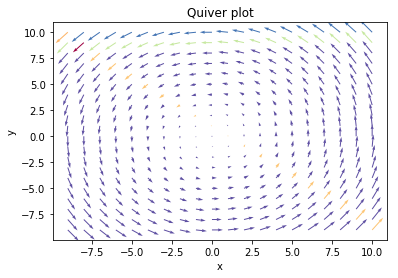

In [12]:
plt.quiver(X[1::, 1::], Y[1::, 1::], 
           U[1::, 1::], V[1::, 1::], curlMOLE, cmap='Spectral')
plt.title('Quiver plot')
plt.xlabel('x')
plt.ylabel('y');